In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
5,5.0,116.0,74.0,0.0,NaN,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,NaN,0.248,26.0,1
7,10.0,115.0,NaN,0.0,0.0,35.3,NaN,29.0,0
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


## Preprocessing

In [3]:
df.isna().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [4]:
(df.isna().sum()/len(df)) * 100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

## Imputation

In [6]:
imputate = df.select_dtypes(include=[np.number])

### Mean

In [7]:
df_mean = imputate.fillna(imputate.mean()) 

In [8]:
df_mean.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,0.627000,33.166124,1
1,1.0,85.000000,66.0,29.0,0.0,31.99368,0.351000,31.000000,0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,0.672000,32.000000,1
3,1.0,89.000000,66.0,23.0,94.0,28.10000,0.167000,21.000000,0
4,0.0,120.462481,40.0,35.0,168.0,43.10000,0.465363,33.000000,1


### Median

In [10]:
df_median = imputate.fillna(imputate.median()) 

In [16]:
df_median.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df_median

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.90,0.171,29.0,0
764,2.0,122.0,70.0,27.0,0.0,36.80,0.340,27.0,0
765,5.0,121.0,72.0,23.0,36.0,26.20,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.10,0.365,47.0,1


### Modus

In [21]:
from sklearn.impute import SimpleImputer

df_modus = SimpleImputer(
        missing_values=np.nan,
        strategy='most_frequent')

df_modus = pd.DataFrame(df_modus.fit_transform(df), columns=df.columns)

In [22]:
df_modus.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df_modus.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,22.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,0.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.207,47.0,1.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


## EDA

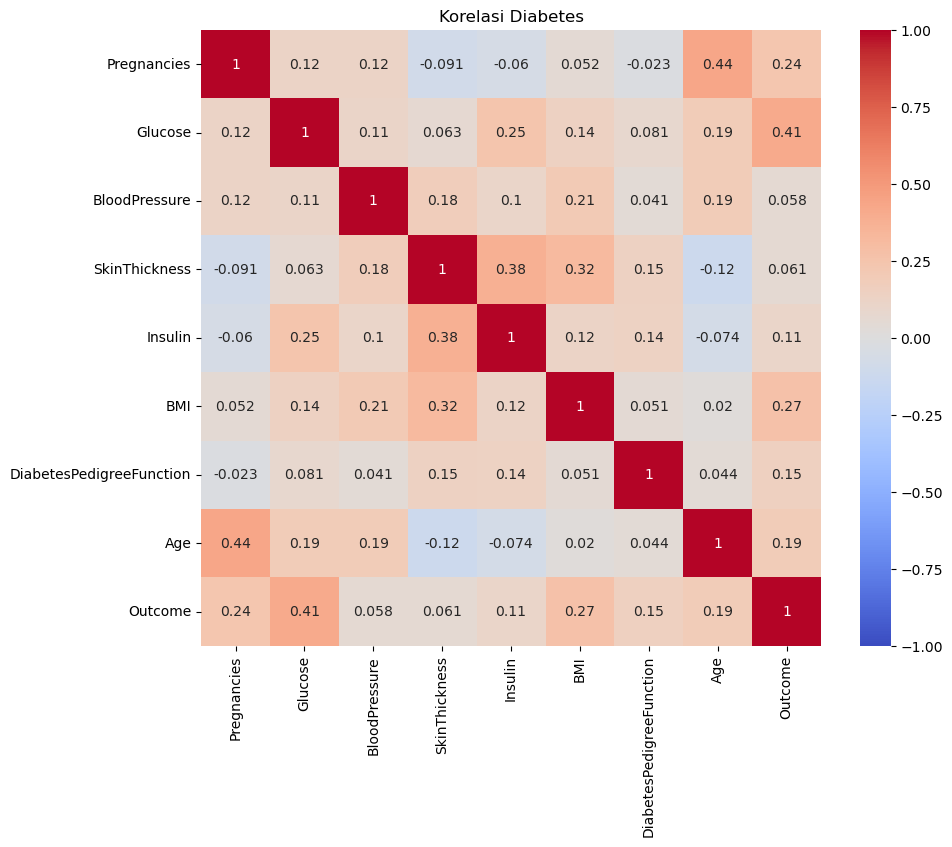

In [29]:
corr_matrix = df_mean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Diabetes')
plt.show()

In [30]:
X = df_mean.drop('Outcome', axis=1) 
y = df_mean['Outcome']

### Under Sampling With Random Under Sampler

In [31]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

<Axes: xlabel='count', ylabel='Outcome'>

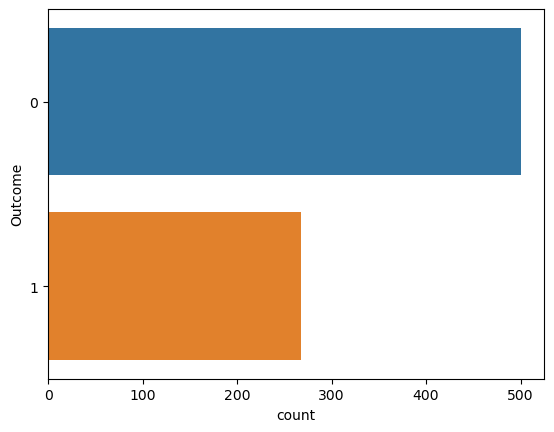

In [32]:
sns.countplot(data=df, y=y)

<Axes: xlabel='count', ylabel='Outcome'>

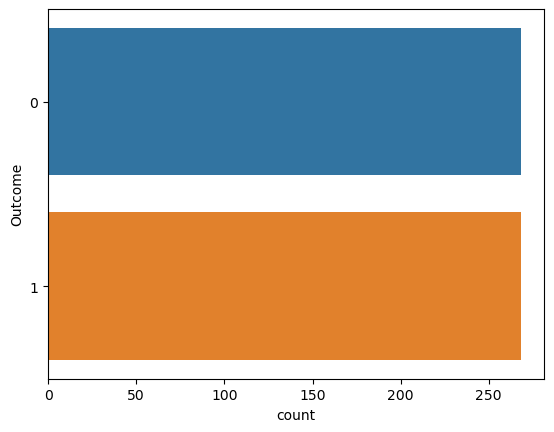

In [34]:
sns.countplot(data=X_resampled, y=y_resampled)

## Scalling Data

### Robust Scaler

In [36]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

df_mean = X_resampled.copy()

scaler = RobustScaler()
df_mean[df_mean.columns.difference(['Outcome'])] = scaler.fit_transform(df_mean[df_mean.columns.difference(['Outcome'])])

print(df_mean.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
556    -0.560637 -0.710984       0.086726        0.56250  0.000000  0.000000   
117     0.239363  0.000000      -1.746607       -0.68750 -0.807123  0.416176   
572    -0.160637 -0.286742      -0.913274        0.28125 -0.345181 -0.608215   
251    -0.360637  0.258713       1.253393       -0.68750 -0.807123 -0.974068   
161     0.639363 -0.559469       0.420060        0.56250  0.000000  1.269834   

     DiabetesPedigreeFunction       Age  
556                 -0.590302 -0.263844  
117                  0.635278 -0.680510  
572                  0.005622 -0.930510  
251                 -0.404779 -0.513844  
161                 -0.629656  0.000000  


### Min Max Scaler

In [37]:
df_mean = X_resampled.copy()

scaler = MinMaxScaler()
df_mean[df_mean.columns.difference(['Outcome'])] = scaler.fit_transform(df_mean[df_mean.columns.difference(['Outcome'])])

print(df_mean.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
556     0.058824  0.487437       0.614035       0.404040  0.141581  0.476806   
117     0.294118  0.605339       0.421053       0.000000  0.000000  0.502235   
572     0.176471  0.557789       0.508772       0.313131  0.081031  0.439642   
251     0.117647  0.648241       0.736842       0.000000  0.000000  0.417288   
161     0.411765  0.512563       0.649123       0.404040  0.141581  0.554396   

     DiabetesPedigreeFunction       Age  
556                  0.059688  0.176471  
117                  0.253898  0.078431  
572                  0.154120  0.019608  
251                  0.089087  0.117647  
161                  0.053452  0.238551  
